#Strojno i duboko učenje - Neuronske mreže

Poslušati o neuronskim mrežama na:
* https://www.youtube.com/watch?v=bfmFfD2RIcg&ab_channel=Simplilearn
* https://www.youtube.com/watch?v=6M5VXKLf4D4&ab_channel=Simplilearn

Dodatno: https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi

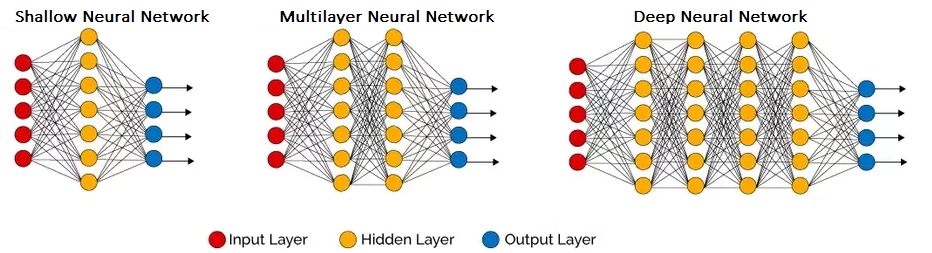

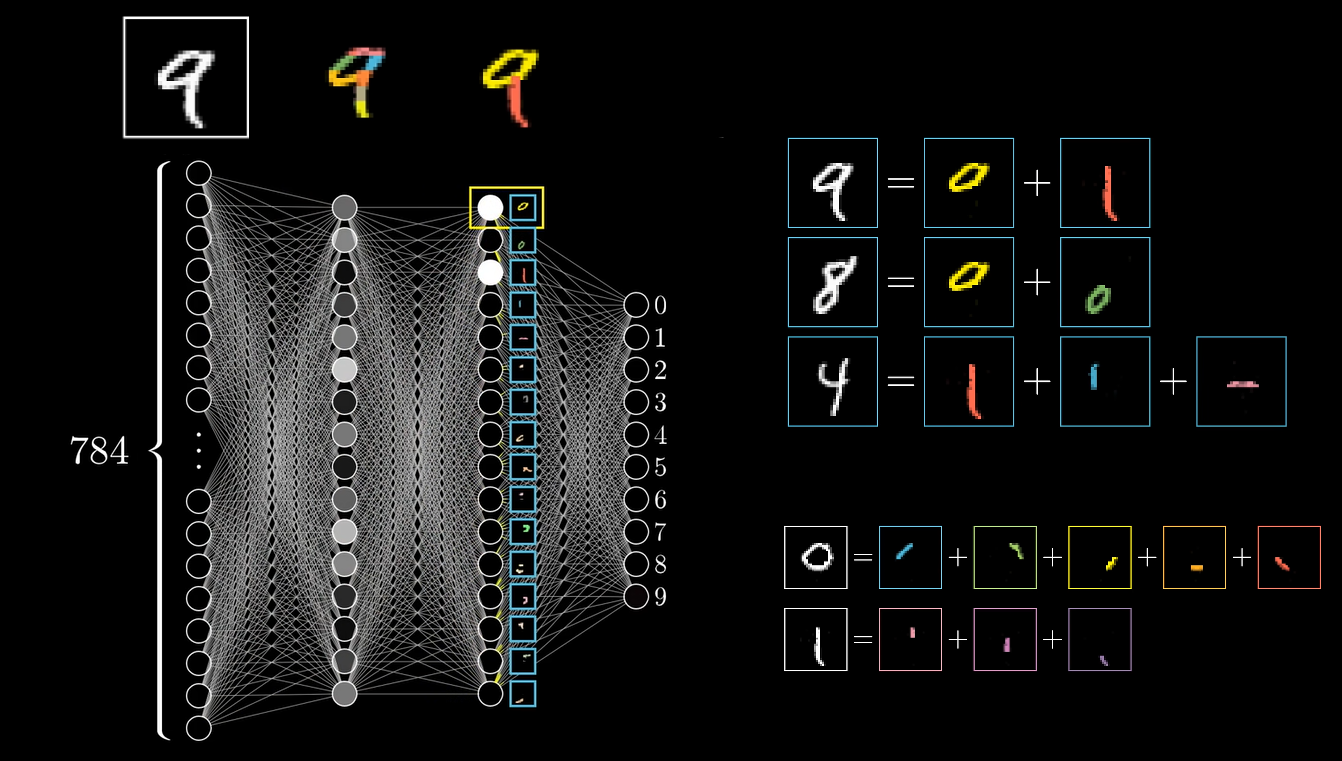

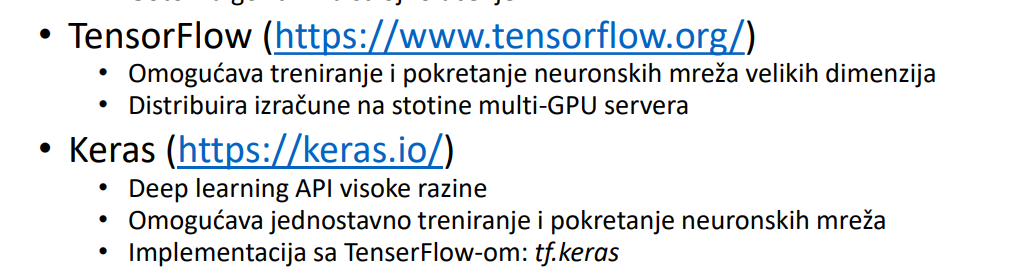

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.15.0'

##Fashion MNIST dataset

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

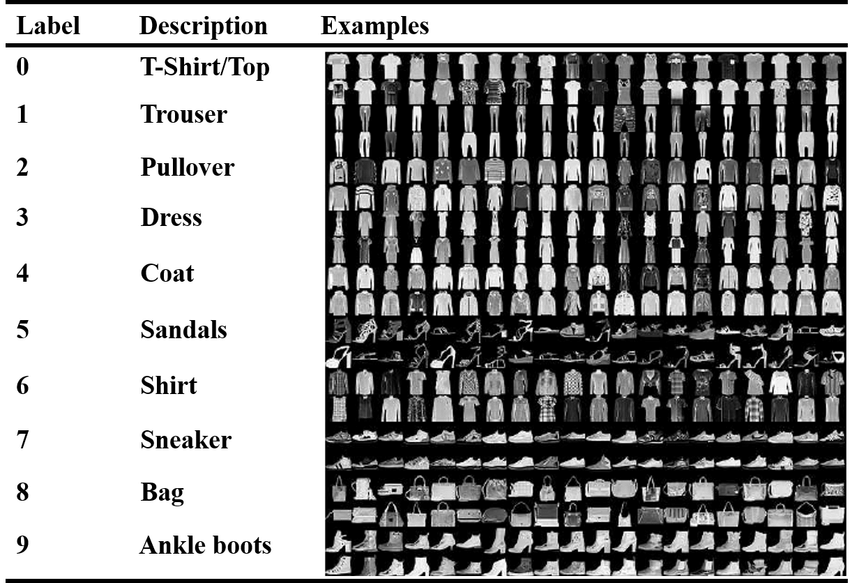

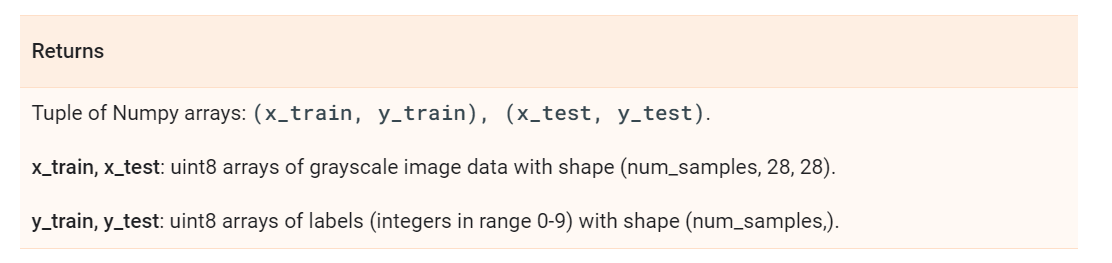

###Dohvacanje podataka

* Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in keras.datasets.
* https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data
* The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set.

In [3]:
baza=keras.datasets.fashion_mnist
(X_train,y_train), (X_test,y_test)=baza.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
class_names=["T-shirt/top", "Trouser", "Pullover","Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
y_train[0]

9

In [8]:
class_names[y_train[0]]

'Ankle boot'

In [9]:
X_train[0].shape

(28, 28)

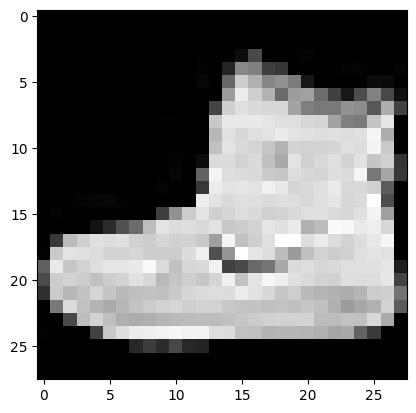

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray')

In [11]:
X_train=X_train/255

In [12]:
X_valid=X_train[:5000]
X_train=X_train[5000:]
y_valid=y_train[:5000]
y_train=y_train[5000:]

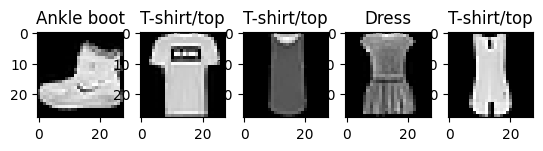

In [13]:
for i in range(0,5):
  plt.subplot(151+i)
  plt.imshow(X_valid[i], cmap='gray')
  plt.title(class_names[y_valid[i]])
plt.show()


###Definiranje modela

####Aktivacijske funkcije

Aktivacijske funkcije odlučuju hoće li određeni neuron biti aktiviran ili ne (zbrajajući težine i bias).

Cilj je uvesti nelinearnost - neuronska mreža bez aktivacijske funcije je jednostavno regresijski model.



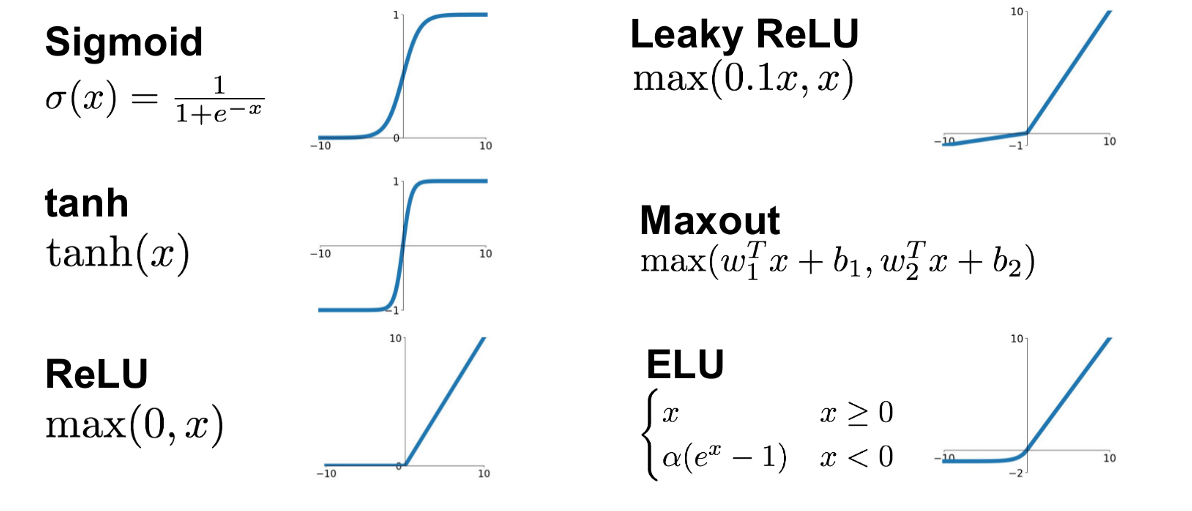

In [14]:
model=keras.models.Sequential()

In [15]:
model.add(keras.layers.Flatten(input_shape=[28,28]))

In [16]:
model.add(keras.layers.Dense(300, activation="relu"))

In [17]:
model.add(keras.layers.Dense(100, activation="relu"))

In [18]:
model.add(keras.layers.Dense(10, activation="softmax"))

In [19]:
model.layers

####Prikaz arhitekture stvorenog modela

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


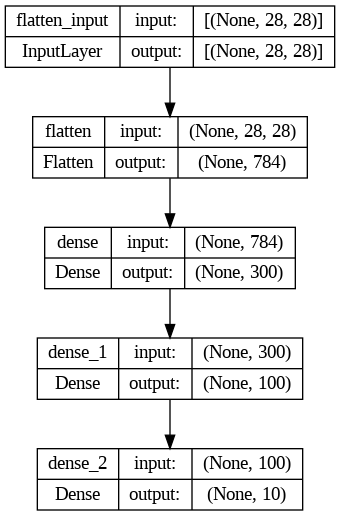

In [21]:
keras.utils.plot_model(model, show_shapes=True)

In [22]:
hidden1=model.layers[1]

In [23]:
weights, bias= hidden1.get_weights()

In [24]:
weights

array([[-0.06094005,  0.02962055, -0.02309486, ..., -0.06288422,
        -0.01324312, -0.0500589 ],
       [ 0.070352  , -0.03515274, -0.04809655, ..., -0.04971475,
         0.04923429,  0.01798429],
       [-0.05490538,  0.02042819, -0.02559312, ..., -0.01840512,
         0.0332567 , -0.0607585 ],
       ...,
       [ 0.06727193,  0.05644499, -0.03700116, ...,  0.02343841,
         0.07261452,  0.03050473],
       [-0.05256438, -0.06475436, -0.03320796, ...,  0.017466  ,
        -0.05396302,  0.07283223],
       [ 0.017487  , -0.02869108,  0.05089015, ...,  0.04649328,
        -0.06772804,  0.01935725]], dtype=float32)

###Kompailiranje modela

Definiramo funkciju gubitka (eng. loss function) koju čemo koristiti.

* npr. cross entropy ili mean square error


Definiramo metodu optimizacije
* npr. Adam ili običan SGD

Definiramo što želimo pratiti, koje sve parametare
* npr. točnost (eng. accuracy)




In [25]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"]) #mozemo nabrojati više metrika

###Treniranje modela

**Definiramo**:
* podatke nad kojima treniramo model
* batch size - broj podataka za treniranje korišteno prilikom jedne iteracije, odnosno broj uzoraka na kojima se radi prije ažuriranja modela (najbolja stabilnost i rezultati se postižu sa 32 ili manje, što je veči broj to se brže trenira, ali lošije, po defoaultu je postavljeno na 32, ako želimo mijenjati onda dodamo parametar)
 *  The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset.
* broj epocha - broj potpunih prolaza kroz training set; epoch se sastoji od više batcha, označava period u kojem su svi uzorci imali priliku se ažurirati;  
 * The number of epochs can be set to an integer value between one and infinity. You can run the algorithm for as long as you like
* podatke za validaciju, ili veličinu skupa za validaciju




**Primjer epoch i batch:**

Assume you have a dataset with 200 samples (rows of data) and you choose a batch size of 5 and 1,000 epochs.
This means that the dataset will be divided into 40 batches, each with five samples. The model weights will be updated after each batch of five samples.
This also means that one epoch will involve 40 batches or 40 updates to the model.
With 1,000 epochs, the model will be exposed to or pass through the whole dataset 1,000 times. That is a total of 40,000 batches during the entire training process.

In [26]:
history=model.fit(X_train,y_train,batch_size=32, epochs=20, validation_data=(X_valid, y_valid))
#history=model.fit(X_train,y_train,batch_size=256, epochs=20, validation_split=0.2)

Epoch 1/20
1719/1719 [==============================] - 14s 6ms/step - loss: 0.7172 - accuracy: 0.7635 - val_loss: 0.5121 - val_accuracy: 0.8246
Epoch 2/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4911 - accuracy: 0.8294 - val_loss: 0.4867 - val_accuracy: 0.8204
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4473 - accuracy: 0.8433 - val_loss: 0.4261 - val_accuracy: 0.8530
Epoch 4/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4184 - accuracy: 0.8545 - val_loss: 0.4224 - val_accuracy: 0.8552
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3992 - accuracy: 0.8588 - val_loss: 0.3741 - val_accuracy: 0.8718
Epoch 6/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3831 - accuracy: 0.8651 - val_loss: 0.3749 - val_accuracy: 0.8678
Epoch 7/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3689 - accuracy: 0.8702 - val_loss: 0.3631 - val_accuracy

**Vizualizacija rezultata treniranja**

Nakon treniranja možemo vizualizirati loss i točnost prilikom treniranja i validacije.

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

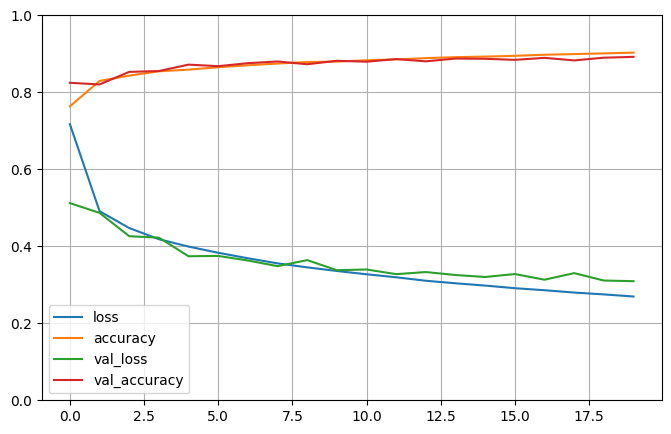

In [28]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0,1)
plt.show()

###Testiranje

In [29]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 69.8466 - accuracy: 0.8355


[69.84664154052734, 0.8355000019073486]

In [30]:
predikcije=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [31]:
predikcije

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
import numpy as np
y_pred=np.argmax(predikcije,axis=-1)

In [33]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [34]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U11')

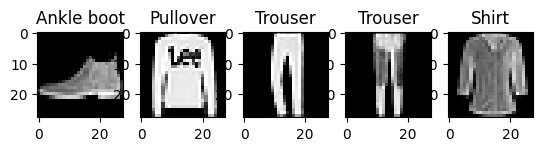

In [35]:
for i in range(0,5):
  plt.subplot(151+i)
  plt.imshow(X_test[i], cmap='gray')
  plt.title(class_names[y_pred[i]])   #što je predvidjelo
plt.show()

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.76      0.90      0.82      1000
     Trouser       0.92      0.98      0.95      1000
    Pullover       0.81      0.70      0.75      1000
       Dress       0.92      0.79      0.85      1000
        Coat       0.62      0.93      0.74      1000
      Sandal       0.98      0.91      0.94      1000
       Shirt       0.87      0.41      0.55      1000
     Sneaker       0.98      0.76      0.86      1000
         Bag       0.91      0.98      0.94      1000
  Ankle boot       0.79      1.00      0.88      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.83     10000
weighted avg       0.85      0.84      0.83     10000



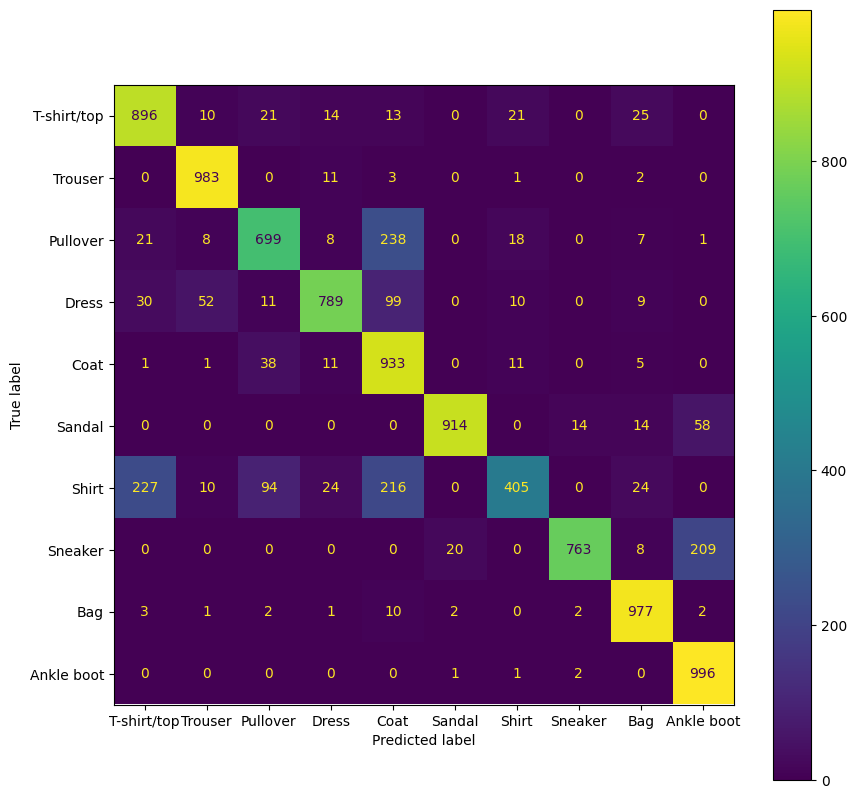

In [37]:
from sklearn import metrics
matrica_konfuzije = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrica_konfuzije, display_labels = class_names)
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.show()